## Importing packages
If you are working with a notebook, it is a good practice to import all the packages that you need at the top of the notebook. This will automatically give you a rough idea of what the notebook is about, and you will avoid random package imports throughout the notebook.

- Import the three packages you have used so far with their correct renaming conventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading csv files
The package pandas introduces the function `pd.read_csv()` that allows you to turn a csv file directly into a data frame. Depending on the specific format of the csv file, you have to use quite a few arguments to `pd.read_csv()` to read the csv file without any errors. See the following arguments that are useful/required to load the temperature csv files:
- `sep`: separator of the data columns, this will be a comma in most cases but sometimes this is also a semicolon
- `decimal`: decimal character for numerical data, this will be a comma if the file uses a "German" number format
- `names`: list of names to use for the columns, use this if the column names are not (well) specified in the csv file
- `usecols`: list of columns to use, if there are six columns in the csv file but you don't need the first and the last one, use `[1, 2, 3, 4]`
- `index_col`: specify the column to be used as the index, this is applied after `usecols`
- `skiprows`: skip the specified number/list of rows before starting to read the data columns, use this if there is some metadata at the top of your csv file
- `header`: index of the row where the column names are specified, this is counted after applying `skiprows`
- `nrows`: specify the number of rows to load, use this if you only want to load the entire csv file at once
- `encoding`: to save text in a file you need an encoding that specifies how strings are transformed to bytes, the default here should be `"utf-8"`

In any case, you should always open a csv file in an editor first to check the format. Unless you already know the arguments for the specific format, this will always be quicker than trying to blindly read the file with pandas.  

For the temperature and pressure files in the folders `thr_188*` the encoding is `"cp1252"`. Without this encoding, pandas raises a `UnicodeDecodeError` with the error message `'utf-8' codec can't decode byte 0xb0 in position 740: invalid start byte`. If you google the error message, there is a Stack Overflow question where this issue is adressed https://stackoverflow.com/q/18171739. There are several suggestions to solve this issue, but only using `encoding="cp1252"` actually resolves the issue. The encoding seems to be somehow related to Windows, maybe the data was saved/exported to the csv file on a Windows machine?

- Look at the csv file for the temperature and pressure data in an editor. Which rows do you have to skip to get the actual data columns?
- Either define the column names manually or adjust `skiprows` and use the `header` to get the column names directly from the csv file.
- Rename the columns if necessary. You can assign a new list of column names to `df.columns` or you can use the method `df.rename()` with the argument `columns`.
- The time data should be the index of the data frame. If this is still a column in your data frame, use the method `df.set_index()` to move the column to the index.

In [2]:
file_name = "temp_data/thr_1881/20230504-20230616_aqt-obg-188_SN1881.csv"
# file_name = "temp_data/thr_1883/20230504-20230612_aqt-obg-184_SN1883.csv"
column_names = ["timecode", "raw_temperature", "temperature", "raw_pressure", "pressure"]
columns = [1, 2, 3, 4, 5]
df = pd.read_csv(
    file_name,
    index_col=0, # use the "timecode" column as the index
    names=column_names, # manually set the column names
    usecols=columns, # only use the columns with the indices 1 to 5
    skiprows=18, # skip the first 18 rows
    encoding="cp1252" # specify the file encoding
)

In [3]:
df.index

Index(['03.05.2023 23:00:00', '03.05.2023 23:00:30', '03.05.2023 23:01:00',
       '03.05.2023 23:01:30', '03.05.2023 23:02:00', '03.05.2023 23:02:30',
       '03.05.2023 23:03:00', '03.05.2023 23:03:30', '03.05.2023 23:04:00',
       '03.05.2023 23:04:30',
       ...
       '16.06.2023 15:40:00', '16.06.2023 15:40:30', '16.06.2023 15:41:00',
       '16.06.2023 15:41:30', '16.06.2023 15:42:00', '16.06.2023 15:42:30',
       '16.06.2023 15:43:00', '16.06.2023 15:43:30', '16.06.2023 15:44:00',
       '16.06.2023 15:44:30'],
      dtype='object', name='timecode', length=125850)

## Converting the index to datetime objects
The index of the data frame already looks like a datetime but these are actually just strings. If you want to properly use the index column, you have to convert it to datetime objects. Pandas provides the function `pd.to_datetime()` that will try to interpret strings/numbers as datetime objects. It might be necessary to further specify the format since this is often stored in the local time format. E.g. in Germany we use the format `day.month.year` whereas the everyday format in the US is `month/day/year`. As long as the format does not change throughout the data frame, you can always find a way to convert this to datetime objects. It might however be necessary to manually specify the datetime format. Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to learn more about the options to interpret strings/numbers as datetime objects.

- Convert the index of the data frame to a DatetimeIndex with the function `pd.to_datetime()`. You can directly reassign the DatetimeIndex to `df.index`.
- What is the type of the individual values in the DatetimeIndex? Find out how you can get the hour, minute, day of week from an individual value  and from the entire DatetimeIndex.

In [4]:
# either use dayfirst=True to specify the "German" format
df.index = pd.to_datetime(df.index, dayfirst=True)

In [5]:
# specify format to convert strings to datetimes
timecode_format = "%d.%m.%Y %H:%M:%S"
df.index = pd.to_datetime(df.index, format=timecode_format)

## Indexing the data frame with datetime ranges
Since the index is now a DatetimeIndex, you can conveniently specify time ranges to select rows from the data frame. You don't even have to create a `pd.Timestamp`, you can directly use strings in the format `year-month-day`. As an example, if you want to select the data from `10.06.2023` to `14.06.2023`, you can use
```python
df.loc["2023-06-10":"2023-06-14"]
```
If you only specify the date, the time will default to midnight in both cases. You can however also include the time if you need a more fine-grained row selection.

- What happens if you use a single date (not a range) to index the data frame? What will be the first/last time in the selected rows?
- Use an index range to get rows from an 8 hour interval on a date of your choice. What is the average temperature and pressure in the selected interval?
- Create a plot to display one week of temperature data (from Monday to Sunday).

In [6]:
df.loc["2023-05-25"]

,raw_temperature,temperature,raw_pressure,pressure
timecode,,,,
2023-05-25 00:00:00,30032,15.511612,26710,1.050942
2023-05-25 00:00:30,30032,15.511612,26703,1.048996
2023-05-25 00:01:00,30031,15.512939,26703,1.048996
2023-05-25 00:01:30,30031,15.512939,26704,1.049274
2023-05-25 00:02:00,30031,15.512939,26709,1.050664
...,...,...,...,...
2023-05-25 23:57:30,28826,17.125778,26713,1.051776
2023-05-25 23:58:00,28849,17.094715,26711,1.051220
2023-05-25 23:58:30,28866,17.071762,26714,1.052054


In [7]:
df.loc["2023-06-01 04:30":"2023-06-01 12:30"].mean()

raw_temperature    27683.958420
temperature           18.688401
raw_pressure       26667.024948
pressure               1.038996
dtype: float64

<Axes: xlabel='timecode'>

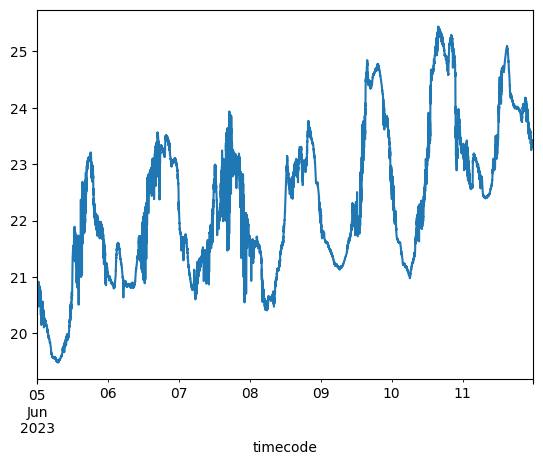

In [8]:
df.loc["2023-06-05":"2023-06-11"]["temperature"].plot()